In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer

# Correlation Analysis

In [2]:
df = pd.read_csv('data/advertising_data.csv')

In [3]:
# Recode values ​​related to the funnel_stage into numbered format
df['funnel_stage'] = df['funnel_stage'].apply(lambda x: 1 if x == 'interest' else 2 if x == 'consideration' else 3 if x == 'intent' else 4)

# Create dummy variables for ad_channel and os
df = pd.get_dummies(df, columns=['ad_channel', 'os'], drop_first=True)
df.head()

,user_id,funnel_stage,timestamp,profit,price,ad_channel_native,ad_channel_organic_traffic,ad_channel_other,ad_channel_partner_network,ad_channel_rich,ad_channel_search,ad_channel_video,os_iOS
0,219687,1,150000,0.0,0.5,0,0,0,0,0,0,0,0
1,897013,1,150000,0.0,0.0,0,1,0,0,0,0,0,0
2,242700,1,150000,0.0,0.0,0,1,0,0,0,0,0,0
3,143856,1,150000,0.0,0.0,0,1,0,0,0,0,0,0
4,26717,2,150000,0.0,0.0,0,1,0,0,0,0,0,0


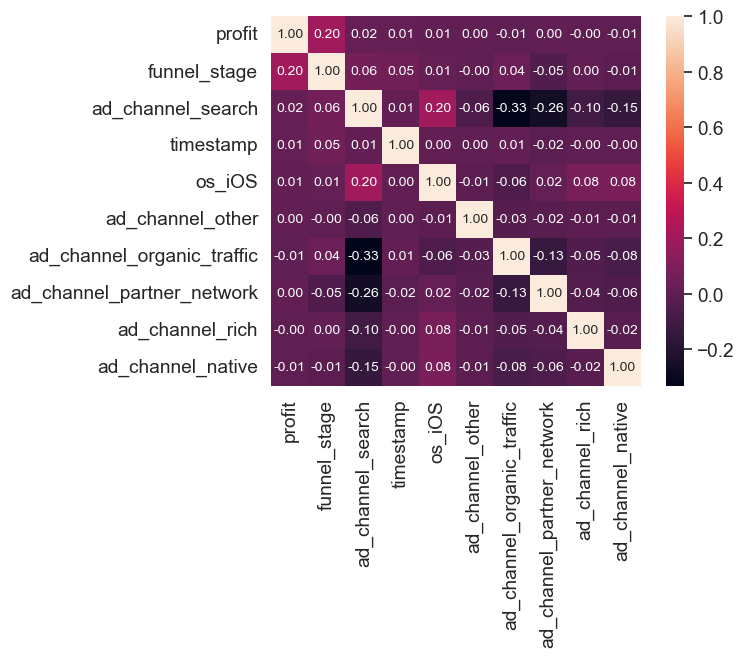

In [4]:
# Apply the factorize method and calculate correlations
corr_matrix = df.apply(lambda x: pd.factorize(x)[0]).corr()

# Draw a matrix of correlations 
k = 10 #number of variables for heatmap
cols = corr_matrix.nlargest(k, 'profit')['profit'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [5]:
# Correlation of variables with profit
df.corr()['profit'].sort_values(ascending=False)

profit                        1.000000
funnel_stage                  0.202892
user_id                       0.022989
ad_channel_search             0.020596
timestamp                     0.014378
price                         0.012527
os_iOS                        0.006078
ad_channel_partner_network    0.004848
ad_channel_other              0.001789
ad_channel_rich              -0.002249
ad_channel_organic_traffic   -0.005581
ad_channel_native            -0.006150
ad_channel_video             -0.021427
Name: profit, dtype: float64

# Factor Analysis

<Axes: >

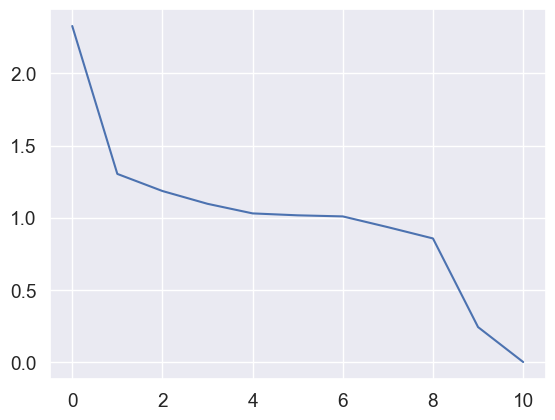

In [6]:
# Perform factor analysis
X = df.drop(['user_id', 'profit'], axis=1)
y = df['profit']

scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

fa = FactorAnalyzer(n_factors=3)
fa.fit(X_sc)

# Check the eigenvalues
ev, v = fa.get_eigenvalues()
sns.lineplot(data=ev)

In [7]:
n_factors=5

fa = FactorAnalyzer(n_factors=n_factors)
fa.fit(X_sc)

loadings = pd.DataFrame(fa.loadings_, index=X.columns, columns=['factor_{x}'.format(x=x+1) for x in range(n_factors)])

In [8]:
def index(factor, n):
    return loadings[factor].sort_values(ascending=False).index[n]

def value(factor, n):
    return loadings[factor].sort_values(ascending=False).values[n]

# Print the variables with the highest and lowest loadings for each factor
for factor in loadings.columns:
    print(factor)
    highest_index = index(factor, 0)
    highest_value = value(factor, 0)
    lowest_index = index(factor, -1)
    lowest_value = value(factor, -1)
    print('Highest: {index} ({value})'.format(index=highest_index, value=highest_value))
    print('Lowest: {index} ({value})'.format(index=lowest_index, value=lowest_value))
    print('\n')


factor_1
Highest: price (0.9844884241229324)
Lowest: ad_channel_organic_traffic (-0.7957146394633943)


factor_2
Highest: ad_channel_partner_network (1.0446656648169823)
Lowest: ad_channel_video (-0.30138887758518595)


factor_3
Highest: ad_channel_native (1.038462540171119)
Lowest: ad_channel_search (-0.2579344360072197)


factor_4
Highest: ad_channel_rich (1.01101692604458)
Lowest: ad_channel_search (-0.23929523954343204)


factor_5
Highest: ad_channel_organic_traffic (0.5454343928733367)
Lowest: ad_channel_video (-0.6983303420553627)


